# Dataset Description

The features were extracted from the silhouettes by the HIPS (Hierarchical Image Processing System) extension BINATTS, which extracts a combination of scale independent features utilising both classical moments based measures such as scaled variance, skewness and kurtosis about the major/minor axes and heuristic measures such as hollows, circularity, rectangularity and compactness. 

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars. 

# Problem statement

The objective is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.

# Data Dictionary
													
* 1- compactness

* 2- circularity 

* 3- distance_circularity 

* 4- radius_ratio 

* 5- pr.axis_aspect_ratio

* 6- max.length_aspect_ratio

* 7- scatter_ratio

* 8- elongatedness

* 9- pr.axis_rectangularity	 

* 10- max.length_rectangularity

* 11- scaled_variance

* 12- scaled_variance.1

* 13- scaled_radius_of_gyration 

* 14- scaled_radius_of_gyration.1	

* 15- skewness_about

* 16- skewness_about.1

* 17- skewness_about.2 

* 18- hollows_ratio

* 19- class

# 1. Import the Libraries

In [65]:
#For numerical libraries
import numpy as np
#To handle data in the form of rows and columns
import pandas as pd
#importing seaborn for statistical plots
import seaborn as sns
#importing ploting libraries
import matplotlib.pyplot as plt
#styling figures
plt.rc('font',size=14)
sns.set(style='white')
sns.set(style='whitegrid',color_codes=True)
#To enable plotting graphs in Jupyter notebook
%matplotlib inline
#importing the Encoding library
from sklearn.preprocessing import LabelEncoder
#Build the model with the best hyper parameters
from sklearn.model_selection import cross_val_score
#importing the zscore for scaling
from scipy.stats import zscore
#Importing PCA for dimensionality reduction and visualization
from sklearn.decomposition import PCA
# Import Logistic Regression machine learning library
from sklearn.linear_model import LogisticRegression 
# Import Support Vector Classifier machine learning library
from sklearn.svm import SVC
#Import Naive Bayes' machine learning Library
from sklearn.naive_bayes import GaussianNB
#Import Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split
#Grid search to tune model parameters for SVC
from sklearn.model_selection import GridSearchCV
# Import the metrics
from sklearn import metrics

# 2. Load the dataset

In [66]:
#reading the CSV file into pandas dataframe
vehicle_df=pd.read_csv('vehicle.csv')

In [67]:
#Check top 5 records of the dataset
vehicle_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


* It shows that there are 18 independent variables (compactness,	circularity, distance_circularity,	radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, max.length_rectangularity,	scaled_variance, scaled_variance.1,	scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1,	skewness_about.2, hollows_ratio) and one dependent variable (class).
* Only the class variable is non numeric others are numeric.

In [68]:
#Check the last 5 records of the dataset
vehicle_df.tail()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
841,93,39.0,87.0,183.0,64.0,8,169.0,40.0,20.0,134,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195,car
842,89,46.0,84.0,163.0,66.0,11,159.0,43.0,20.0,159,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197,van
843,106,54.0,101.0,222.0,67.0,12,222.0,30.0,25.0,173,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201,car
844,86,36.0,78.0,146.0,58.0,7,135.0,50.0,18.0,124,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195,car
845,85,36.0,66.0,123.0,55.0,5,120.0,56.0,17.0,128,140.0,212.0,131.0,73.0,1.0,18.0,186.0,190,van


# 3. Data Preprocessing

##  Understanding the data

### Data types and data description

In [69]:
#To show the detailed summary 
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

* It gives the information about the number of rows, number of columns, data types , memory usage, number of null values in each columns.

In [70]:
#Analyze the distribution of the dataset
vehicle_df.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


* It gives the descriptive statistics (mean, median, mode, percentiles, min, max, standard deviation) of the columns of the dataset.
* By analysing it, we can see that
  
  -compactness, circularity, distance_circularity, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about.2, hollows_ratio are approximately normally distributed.
    
    -radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, scaled_variance, scaled_variance.1, skewness_about, skewness_about.1 are approx. right skewed distribution.
  

In [71]:
#It shows data types of columns
vehicle_df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [72]:
#class attribute is not an object it is a category
vehicle_df['class']=vehicle_df['class'].astype('category')

In [73]:
#To get the shape 
vehicle_df.shape

(846, 19)

* It shows the shape of the dataset i.e. there are 846 rows and 19 columns.

In [74]:
#To get the number of columns
vehicle_df.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

### Checking for Missing Values

In [75]:
#Checking for missing values in the dataset
vehicle_df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [76]:
#replace missing variable('?') into null variable using numpy
vehicle_df = vehicle_df.replace(' ', np.nan)

### Handling the Missing values

In [77]:
#Replacing the missing values by median 
for i in vehicle_df.columns[:17]:
    median_value = vehicle_df[i].median()
    vehicle_df[i] = vehicle_df[i].fillna(median_value)

* As some data are rightly skewed so we will use median to handle the missing values.

In [78]:
# again check for missing values
vehicle_df.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [79]:
# Again check data information
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   compactness                  846 non-null    int64   
 1   circularity                  846 non-null    float64 
 2   distance_circularity         846 non-null    float64 
 3   radius_ratio                 846 non-null    float64 
 4   pr.axis_aspect_ratio         846 non-null    float64 
 5   max.length_aspect_ratio      846 non-null    int64   
 6   scatter_ratio                846 non-null    float64 
 7   elongatedness                846 non-null    float64 
 8   pr.axis_rectangularity       846 non-null    float64 
 9   max.length_rectangularity    846 non-null    int64   
 10  scaled_variance              846 non-null    float64 
 11  scaled_variance.1            846 non-null    float64 
 12  scaled_radius_of_gyration    846 non-null    float64 
 13  scale

* Now, as it shows there are no misisng values present in the features.

### Understanding the outier using boxplot

<AxesSubplot:>

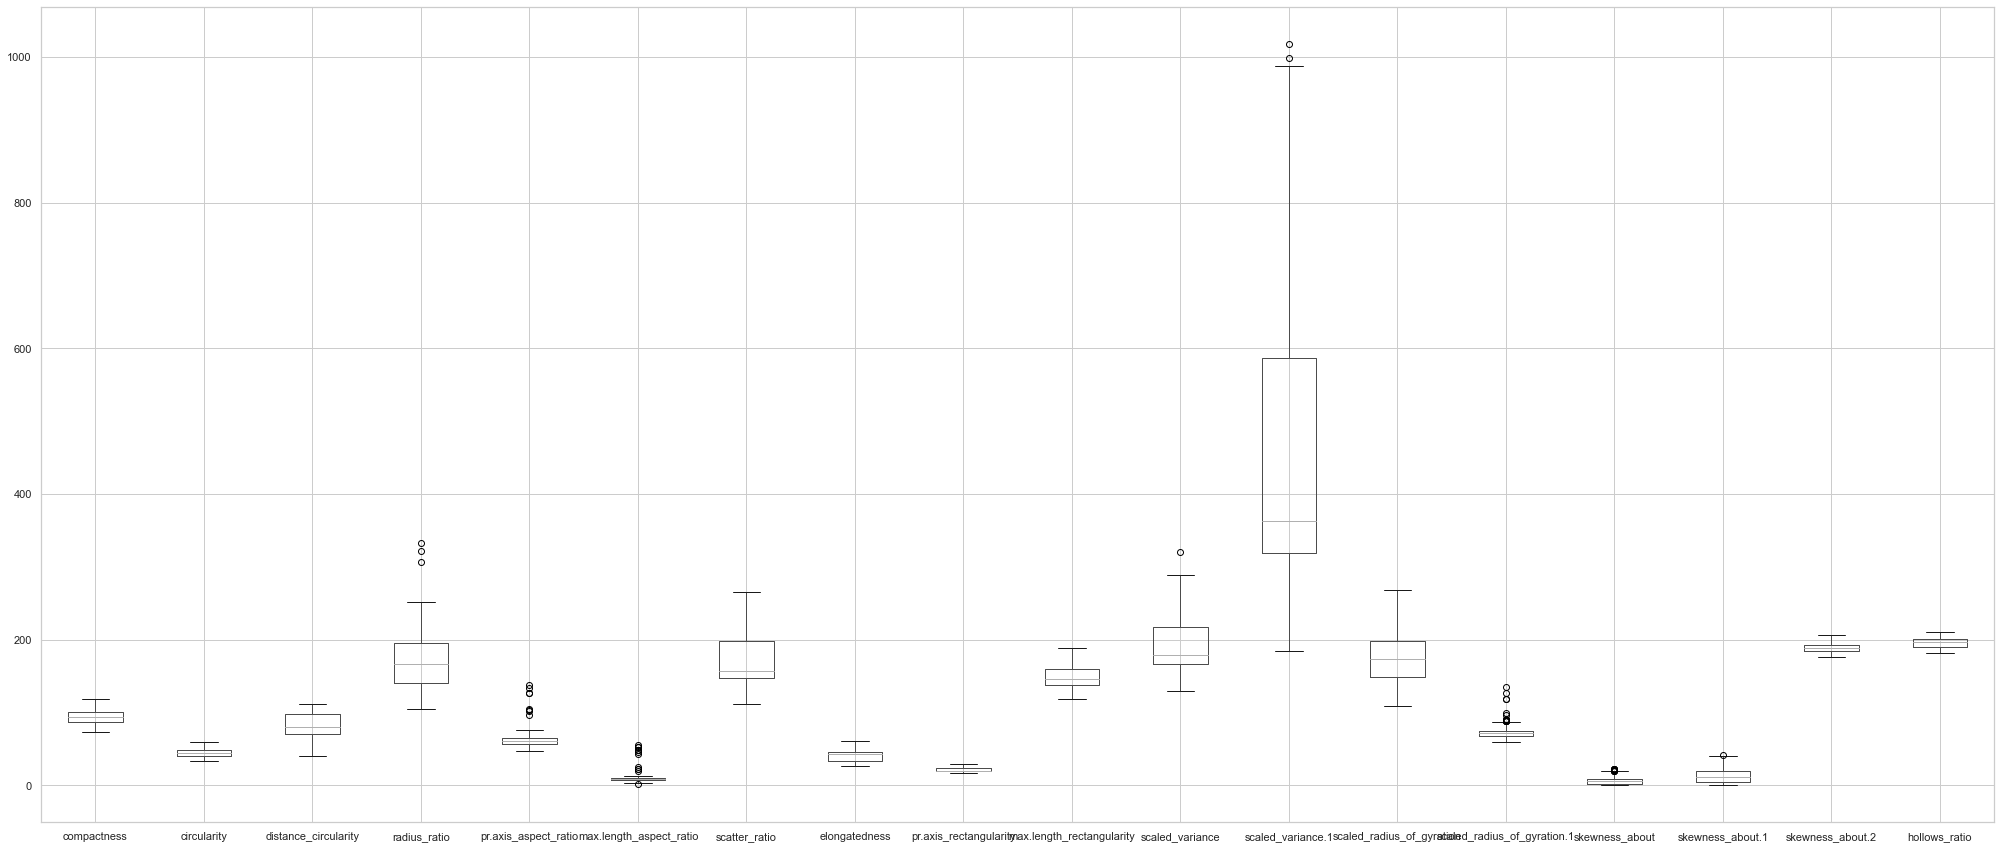

In [80]:
# Understand the spread and outliers in dataset using boxplot
vehicle_df.boxplot(figsize=(35,15))

It is showing that there are some columns which contains outliers such as radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scaled_variance, scaled_variance.1, skewness_about, skewness_about.1.

array([[<AxesSubplot:title={'center':'compactness'}>,
        <AxesSubplot:title={'center':'circularity'}>,
        <AxesSubplot:title={'center':'distance_circularity'}>,
        <AxesSubplot:title={'center':'radius_ratio'}>],
       [<AxesSubplot:title={'center':'pr.axis_aspect_ratio'}>,
        <AxesSubplot:title={'center':'max.length_aspect_ratio'}>,
        <AxesSubplot:title={'center':'scatter_ratio'}>,
        <AxesSubplot:title={'center':'elongatedness'}>],
       [<AxesSubplot:title={'center':'pr.axis_rectangularity'}>,
        <AxesSubplot:title={'center':'max.length_rectangularity'}>,
        <AxesSubplot:title={'center':'scaled_variance'}>,
        <AxesSubplot:title={'center':'scaled_variance.1'}>],
       [<AxesSubplot:title={'center':'scaled_radius_of_gyration'}>,
        <AxesSubplot:title={'center':'scaled_radius_of_gyration.1'}>,
        <AxesSubplot:title={'center':'skewness_about'}>,
        <AxesSubplot:title={'center':'skewness_about.1'}>],
       [<AxesSubplot:tit

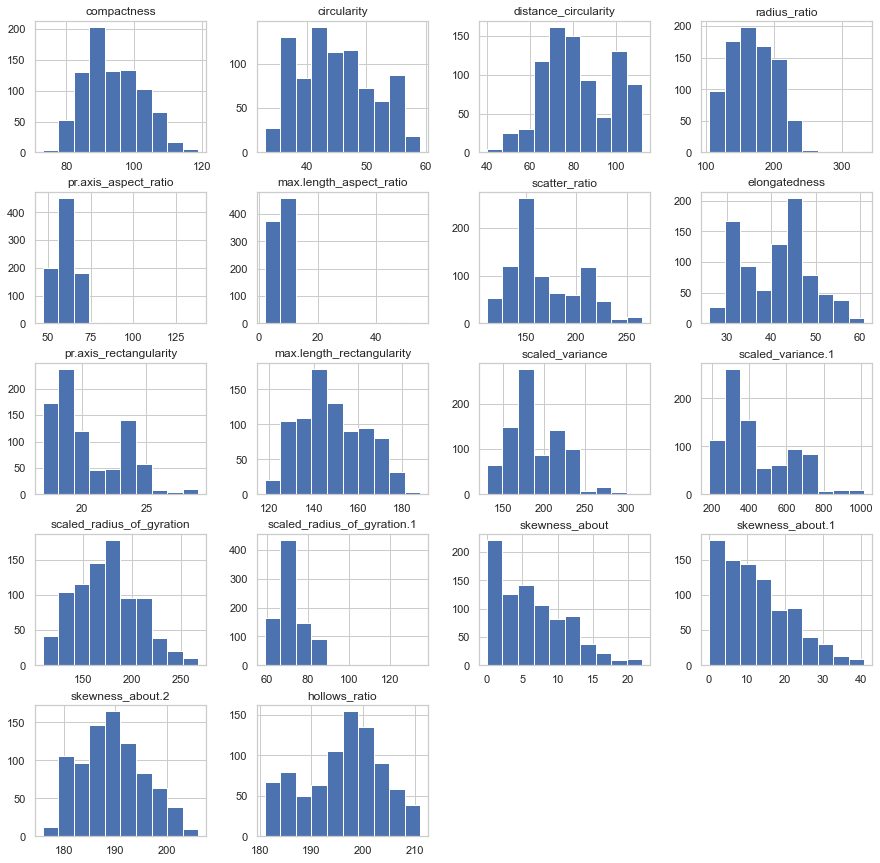

In [81]:
# Histogram 
vehicle_df.hist(figsize=(15,15))

* It is also the distribution of the attributes.

### Handling the outlier

In [82]:
#find the outliers and replace them by median
for col_name in vehicle_df.columns[:-1]:
    q1 = vehicle_df[col_name].quantile(0.25)
    q3 = vehicle_df[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    
    vehicle_df.loc[(vehicle_df[col_name] < low) | (vehicle_df[col_name] > high), col_name] = vehicle_df[col_name].median()

<AxesSubplot:>

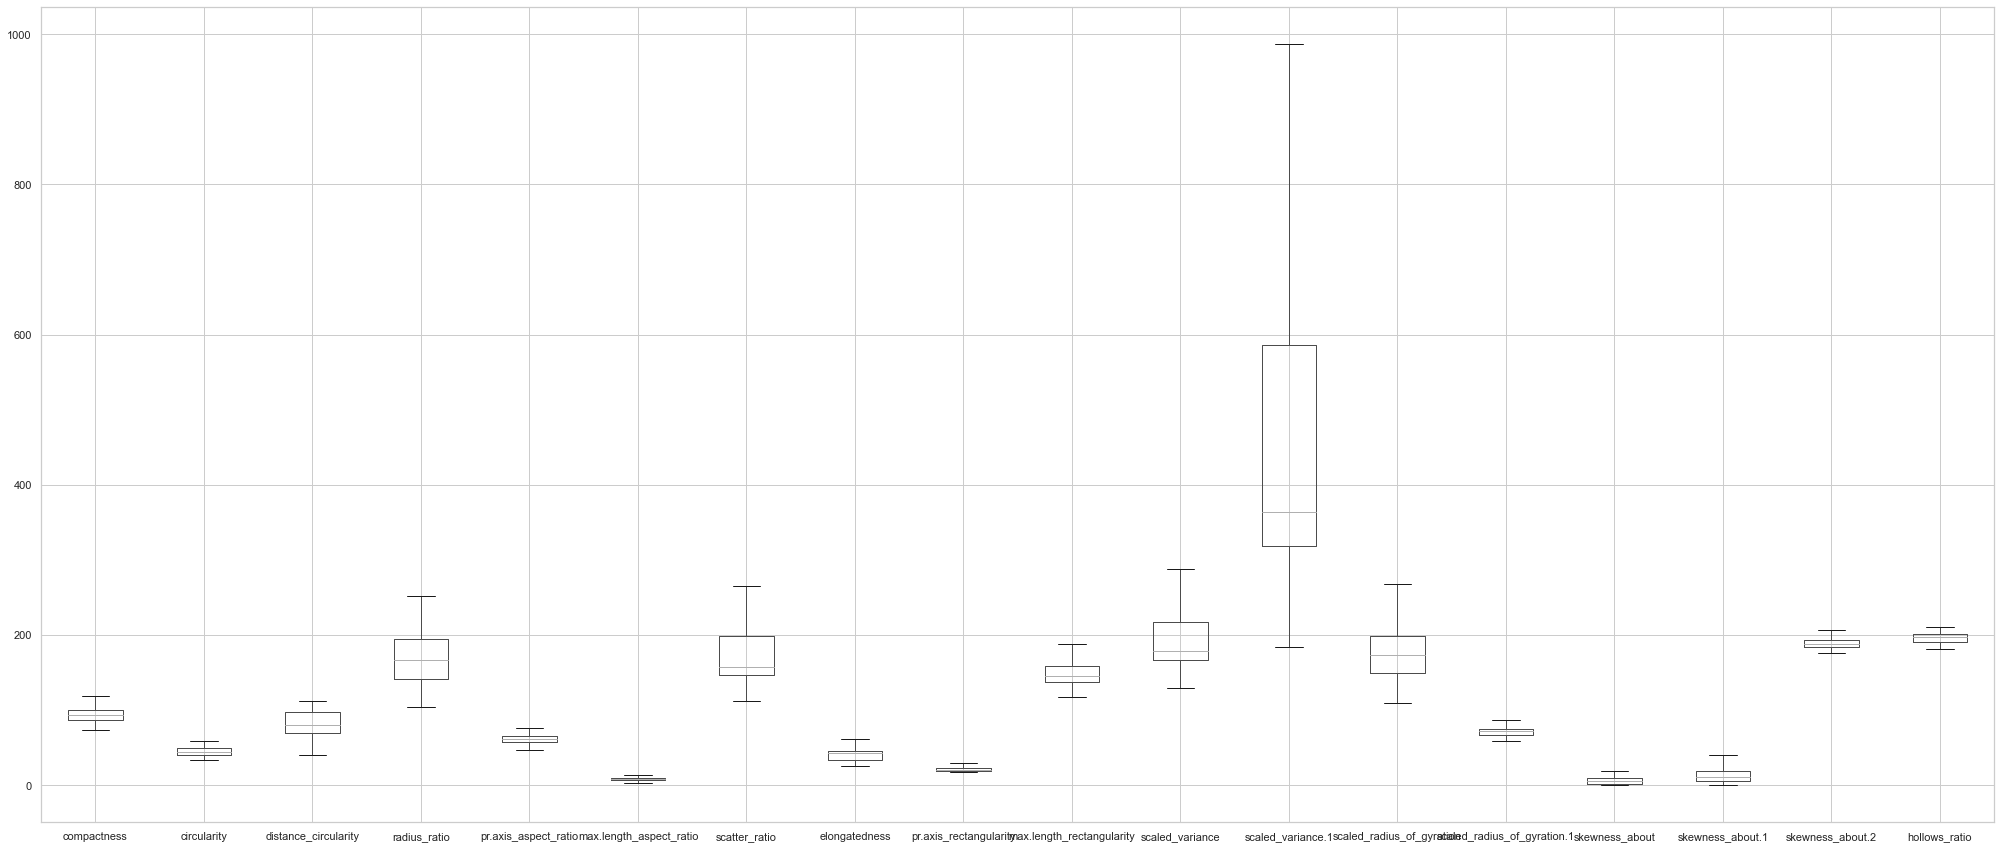

In [83]:
# again check for outliers in dataset using boxplot
vehicle_df.boxplot(figsize=(35,15))

* It shows that after handing outliers there are no outliers present in the dataset.

# 4. Understanding the attributes

### Dependent Attribute
### class

In [84]:
print('Class: \n', vehicle_df['class'].unique())

Class: 
 ['van', 'car', 'bus']
Categories (3, object): ['van', 'car', 'bus']


In [85]:
vehicle_df['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

### Univariate Analysis

D:\official\softwares\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

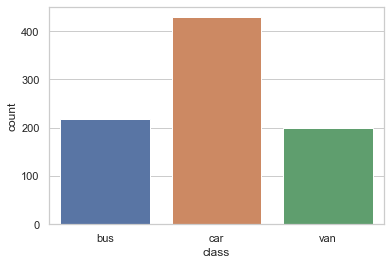

In [86]:
sns.countplot(vehicle_df['class'])

### Encode the dependent attribute

In [87]:
#Encoding of categorical variables
labelencoder_X=LabelEncoder()
vehicle_df['class']=labelencoder_X.fit_transform(vehicle_df['class'])

# 5. Without applying Dimensionality Reduction 

## Splitting the data into independent and dependent attributes

In [88]:
#independent and dependent variables
X=vehicle_df.iloc[:,0:18]
y = vehicle_df.iloc[:,18]

## Splitting the data

In [89]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 10)

### Support Vector Classifier

In [90]:
clf = SVC()
clf.fit(X_train, y_train)
prediction = model.predict(X_test)

NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [34]:
# check the accuracy on the training data
print('Accuracy on Training data: ',model.score(X_train, y_train))
# check the accuracy on the testing data
print('Accuracy on Testing data: ', model.score(X_test , y_test))
#Calculate the recall value 
print('Recall value: ',metrics.recall_score(y_test, prediction, average='macro'))
#Calculate the precision value 
print('Precision value: ',metrics.precision_score(y_test, prediction, average='macro'))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))
print("Classification Report:\n",metrics.classification_report(prediction,y_test))

Accuracy on Training data:  0.6266891891891891
Accuracy on Testing data:  0.594488188976378
Recall value:  0.608675408774486
Precision value:  0.7405060217560218
Confusion Matrix:
 [[15  0  0]
 [16 79  1]
 [40 46 57]]
Classification Report:
               precision    recall  f1-score   support

           0       0.21      1.00      0.35        15
           1       0.63      0.82      0.71        96
           2       0.98      0.40      0.57       143

    accuracy                           0.59       254
   macro avg       0.61      0.74      0.54       254
weighted avg       0.80      0.59      0.61       254



In [35]:
#Store the accuracy results for each kernel in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Model':['SVM'], 'Accuracy': model.score(X_test, y_test)},index={'3'})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Model','Accuracy']]
resultsDf

,Model,Accuracy
1,Logistic,0.874016
2,Naive Bayes,0.594488
3,SVM,0.594488


* Without applying PCA, we can see that Logistic Regression is performing well as compared to other meodels. 

# 6. Applying Dimensionality Reduction using PCA

## Scaling

In [36]:
# Scaling the independent attributes using zscore
X_z=X.apply(zscore)

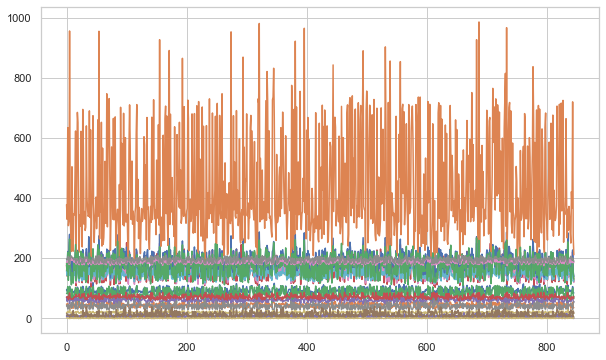

In [37]:
# prior to scaling
plt.rcParams['figure.figsize']=(10,6)
plt.plot(vehicle_df)
plt.show()

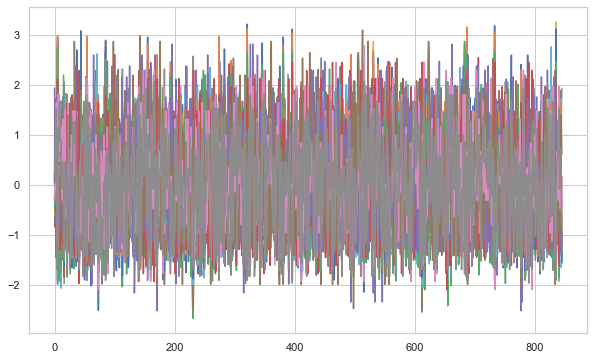

In [38]:
#plt.plot(X_z,figsize=(20,10))
plt.rcParams['figure.figsize']=(10,6)
plt.plot(X_z)
plt.show()

* We can see that scaling has brought down axis and also it has brought every attrubutes on same scale.

## Covariance

In [39]:
# Calculating the covariance between attributes after scaling
cov_matrix = np.cov(X_z.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00118343  0.68569786  0.79086299  0.72277977  0.1930925   0.50051942
   0.81358214 -0.78968322  0.81465658  0.67694334  0.77078163  0.80712401
   0.58593517 -0.24697246  0.19754181  0.1565327   0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.63903532  0.20349327  0.5611334
   0.8489411  -0.82244387  0.84439802  0.96245572  0.80371846  0.82844154
   0.92691166  0.06882659  0.13651201 -0.00967793 -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.79516215  0.24462154  0.66759792
   0.90614687 -0.9123854   0.89408198  0.77544391  0.87061349  0.88498924
   0.70660663 -0.22962442  0.09922417  0.26265581  0.14627113  0.33312625]
 [ 0.72277977  0.63903532  0.79516215  1.00118343  0.65132393  0.46450748
   0.77085211 -0.82636872  0.74502008  0.58015378  0.78711387  0.76115704
   0.55142559 -0.39092105  0.03579728  0.17981316  0.40632957  0.49234013]
 [ 0.1930925   0.20349327  0.24462154  0.65132393  1.00118343  0.15047265
   0.19442484

* Covariance tells about information contained in the mathematical space between the independent attributes.

## Eigenvalues and Eigenvectors

In [40]:
#Finding eigenvalues amd eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-2.72502890e-01 -8.70435783e-02 -3.81852075e-02 -1.38675013e-01
   1.37101466e-01 -2.63611383e-01 -2.02717114e-01  7.58796410e-01
  -3.66685918e-01 -1.60045219e-01 -8.40252779e-02 -2.14645175e-02
  -1.87350749e-02  6.89082276e-02  4.26105276e-02  9.97784975e-02
  -8.22590084e-02 -3.30366937e-02]
 [-2.87254690e-01  1.31621757e-01 -2.01146908e-01  3.80554832e-02
  -1.38995553e-01  7.13474241e-02  3.92275358e-01  6.76034223e-02
  -5.53261885e-02  1.82323962e-01  3.65229874e-02 -1.47247511e-01
  -4.89102355e-02  5.90534770e-02 -6.74107885e-01  1.63466948e-01
  -2.59100771e-01  2.48832011e-01]
 [-3.02421105e-01 -4.61430061e-02  6.34621085e-02 -1.08954287e-01
  -8.00174278e-02  1.69006151e-02 -1.63371282e-01 -2.77371950e-01
  -7.46784853e-02 -2.73033778e-01 -4.68505530e-01 -6.52730855e-01
   4.74162132e-03 -1.62108150e-01 -4.99754439e-04 -6.36582307e-02
   1.20629778e-01  9.80561531e-02]
 [-2.69713545e-01 -1.97931263e-01  5.62851689e-02  2.54355087e-01
   1.33744367e-01  

* Eigenvectors are the new dimensions of the new mathematical space.
* Eigenvalues are the information content of each one of these eigenvectors or we can say it is the spread of these eigenvectors.

In [41]:
# Make a set of (eigenvalue, eigenvector) pairs
eigen_pairs = [(np.abs(eigenvalues[i]), eigenvectors[:,i]) for i in range(len(eigenvalues))]
eigen_pairs.sort(reverse=True)
eigen_pairs[:]

[(9.749402689379604,
  array([-0.27250289, -0.28725469, -0.30242111, -0.26971354, -0.09786073,
         -0.19520014, -0.31052393,  0.3090069 , -0.307287  , -0.27815416,
         -0.29976509, -0.30553237, -0.26323762,  0.04193594, -0.03608321,
         -0.05872048, -0.03801314, -0.08474   ])),
 (3.350719119412978,
  array([-0.08704358,  0.13162176, -0.04614301, -0.19793126, -0.25783995,
         -0.10804563,  0.07528535, -0.01322994,  0.0875602 ,  0.12215424,
          0.07726575,  0.07150302,  0.21058205,  0.50362158, -0.01576632,
         -0.09274624, -0.50162122, -0.50761211])),
 (1.1923815452731605,
  array([-0.03818521, -0.20114691,  0.06346211,  0.05628517, -0.06199275,
         -0.14895782,  0.10904283, -0.09085269,  0.1060705 , -0.21368469,
          0.1445998 ,  0.11034374, -0.20287019,  0.07386402, -0.55917399,
          0.6706805 , -0.06224071, -0.04170535])),
 (1.1338191632147852,
  array([-0.13867501,  0.03805548, -0.10895429,  0.25435509,  0.61276572,
         -0.27867816,

In [42]:
# print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigenvalues)

Eigenvalues in descending order: 
[9.74940269e+00 3.35071912e+00 1.19238155e+00 1.13381916e+00
 8.83997312e-01 6.66265745e-01 3.18150910e-01 2.28179142e-01
 1.31018595e-01 7.98619108e-02 7.33979478e-02 6.46162669e-02
 5.16287320e-03 4.01448646e-02 1.98136761e-02 2.27005257e-02
 3.22758478e-02 2.93936408e-02]


### Finding variance and cummulative variance by each eigenvector

Cumulative Variance Explained [ 54.0993254   72.69242795  79.30893968  85.60048941  90.50578051
  94.2028816   95.96829741  97.23446089  97.96148159  98.40463444
  98.81191882  99.17047375  99.39323715  99.57233547  99.73544045
  99.86140541  99.97135127 100.        ]


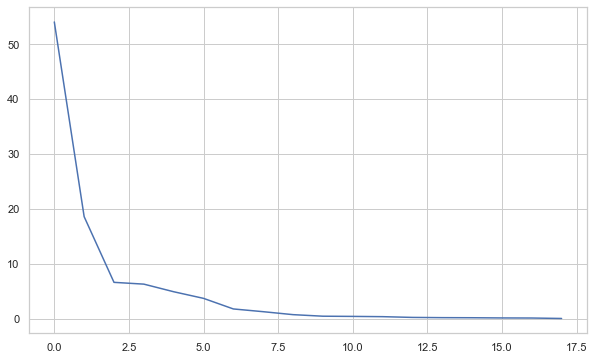

In [43]:
tot = sum(eigenvalues)
var_exp = [( i /tot ) * 100 for i in sorted(eigenvalues, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)
plt.plot(var_exp)

* We can observe that their is steep drop in variance explained with increase in number the number of Principal Components.
* Also, top 10 principal components contribute 98.5% variance (information). So, we can proceed further with 10 components.

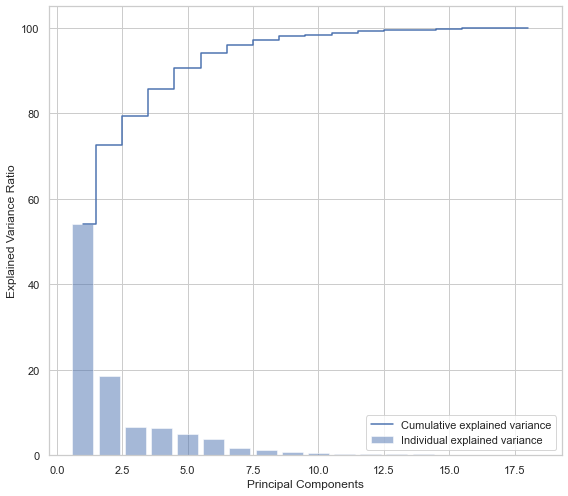

In [44]:
# Ploting 
plt.figure(figsize=(8 , 7))
plt.bar(range(1, eigenvalues.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eigenvalues.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

* Here also we can visualize and eliminiate last 7 principal components because almost 98.5% of the data is captured by 10 principal components.

In [45]:
# Reducing from 17 to 10 dimension space
pca = PCA(n_components=10)
data_reduced = pca.fit_transform(X_z)
data_reduced.transpose()

array([[ 0.58422804, -1.5121798 ,  3.91344816, ...,  5.12009307,
        -3.29709502, -4.96759448],
       [-0.67567325, -0.34893367,  0.2345073 , ..., -0.18227007,
        -1.10194286,  0.42274968],
       [-0.45333356, -0.33343619, -1.26509352, ..., -0.50836783,
         1.93384417,  1.30871531],
       ...,
       [-0.68196902,  0.10442512,  0.17305277, ..., -0.38820845,
         0.45880709, -0.21433678],
       [ 0.31266966, -0.29625823,  0.19108534, ..., -0.07735512,
         0.82142229,  0.59676772],
       [ 0.14411602, -0.39097765, -0.52948668, ...,  0.55527162,
        -0.34059305,  0.10856429]])

In [46]:
pca.components_

array([[ 0.27250289,  0.28725469,  0.30242111,  0.26971354,  0.09786073,
         0.19520014,  0.31052393, -0.3090069 ,  0.307287  ,  0.27815416,
         0.29976509,  0.30553237,  0.26323762, -0.04193594,  0.03608321,
         0.05872048,  0.03801314,  0.08474   ],
       [-0.08704358,  0.13162176, -0.04614301, -0.19793126, -0.25783995,
        -0.10804563,  0.07528535, -0.01322994,  0.0875602 ,  0.12215424,
         0.07726575,  0.07150302,  0.21058205,  0.50362158, -0.01576632,
        -0.09274624, -0.50162122, -0.50761211],
       [-0.03818521, -0.20114691,  0.06346211,  0.05628517, -0.06199275,
        -0.14895782,  0.10904283, -0.09085269,  0.1060705 , -0.21368469,
         0.1445998 ,  0.11034374, -0.20287019,  0.07386402, -0.55917399,
         0.6706805 , -0.06224071, -0.04170535],
       [ 0.13867501, -0.03805548,  0.10895429, -0.25435509, -0.61276572,
         0.27867816,  0.00539295,  0.06521486,  0.03089915,  0.04146747,
        -0.06400509, -0.00219687, -0.08553965, -0.115

In [47]:
X_comp = pd.DataFrame(pca.components_,columns=list(X_z))
X_comp.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.272503,0.287255,0.302421,0.269714,0.097861,0.195200,0.310524,-0.309007,0.307287,0.278154,0.299765,0.305532,0.263238,-0.041936,0.036083,0.058720,0.038013,0.084740
1,-0.087044,0.131622,-0.046143,-0.197931,-0.257840,-0.108046,0.075285,-0.013230,0.087560,0.122154,0.077266,0.071503,0.210582,0.503622,-0.015766,-0.092746,-0.501621,-0.507612
2,-0.038185,-0.201147,0.063462,0.056285,-0.061993,-0.148958,0.109043,-0.090853,0.106070,-0.213685,0.144600,0.110344,-0.202870,0.073864,-0.559174,0.670680,-0.062241,-0.041705
3,0.138675,-0.038055,0.108954,-0.254355,-0.612766,0.278678,0.005393,0.065215,0.030899,0.041467,-0.064005,-0.002197,-0.085540,-0.115400,0.473703,0.428426,-0.027410,0.096037
4,0.137101,-0.138996,-0.080017,0.133744,0.123601,-0.634893,0.085557,-0.079073,0.081646,-0.251113,0.147471,0.110101,-0.005212,0.138069,0.566552,0.130870,0.180519,-0.110788


In [48]:
# P_reduce represents reduced mathematical space.
# Reducing from 17 to 10 dimension space
P_reduce = np.array(eigenvectors[0:10])   
# projecting original data into principal component dimensions
X_std_10D = np.dot(X_z,P_reduce.T)   
# converting array to dataframe for pairplot
Proj_data_df = pd.DataFrame(X_std_10D)  

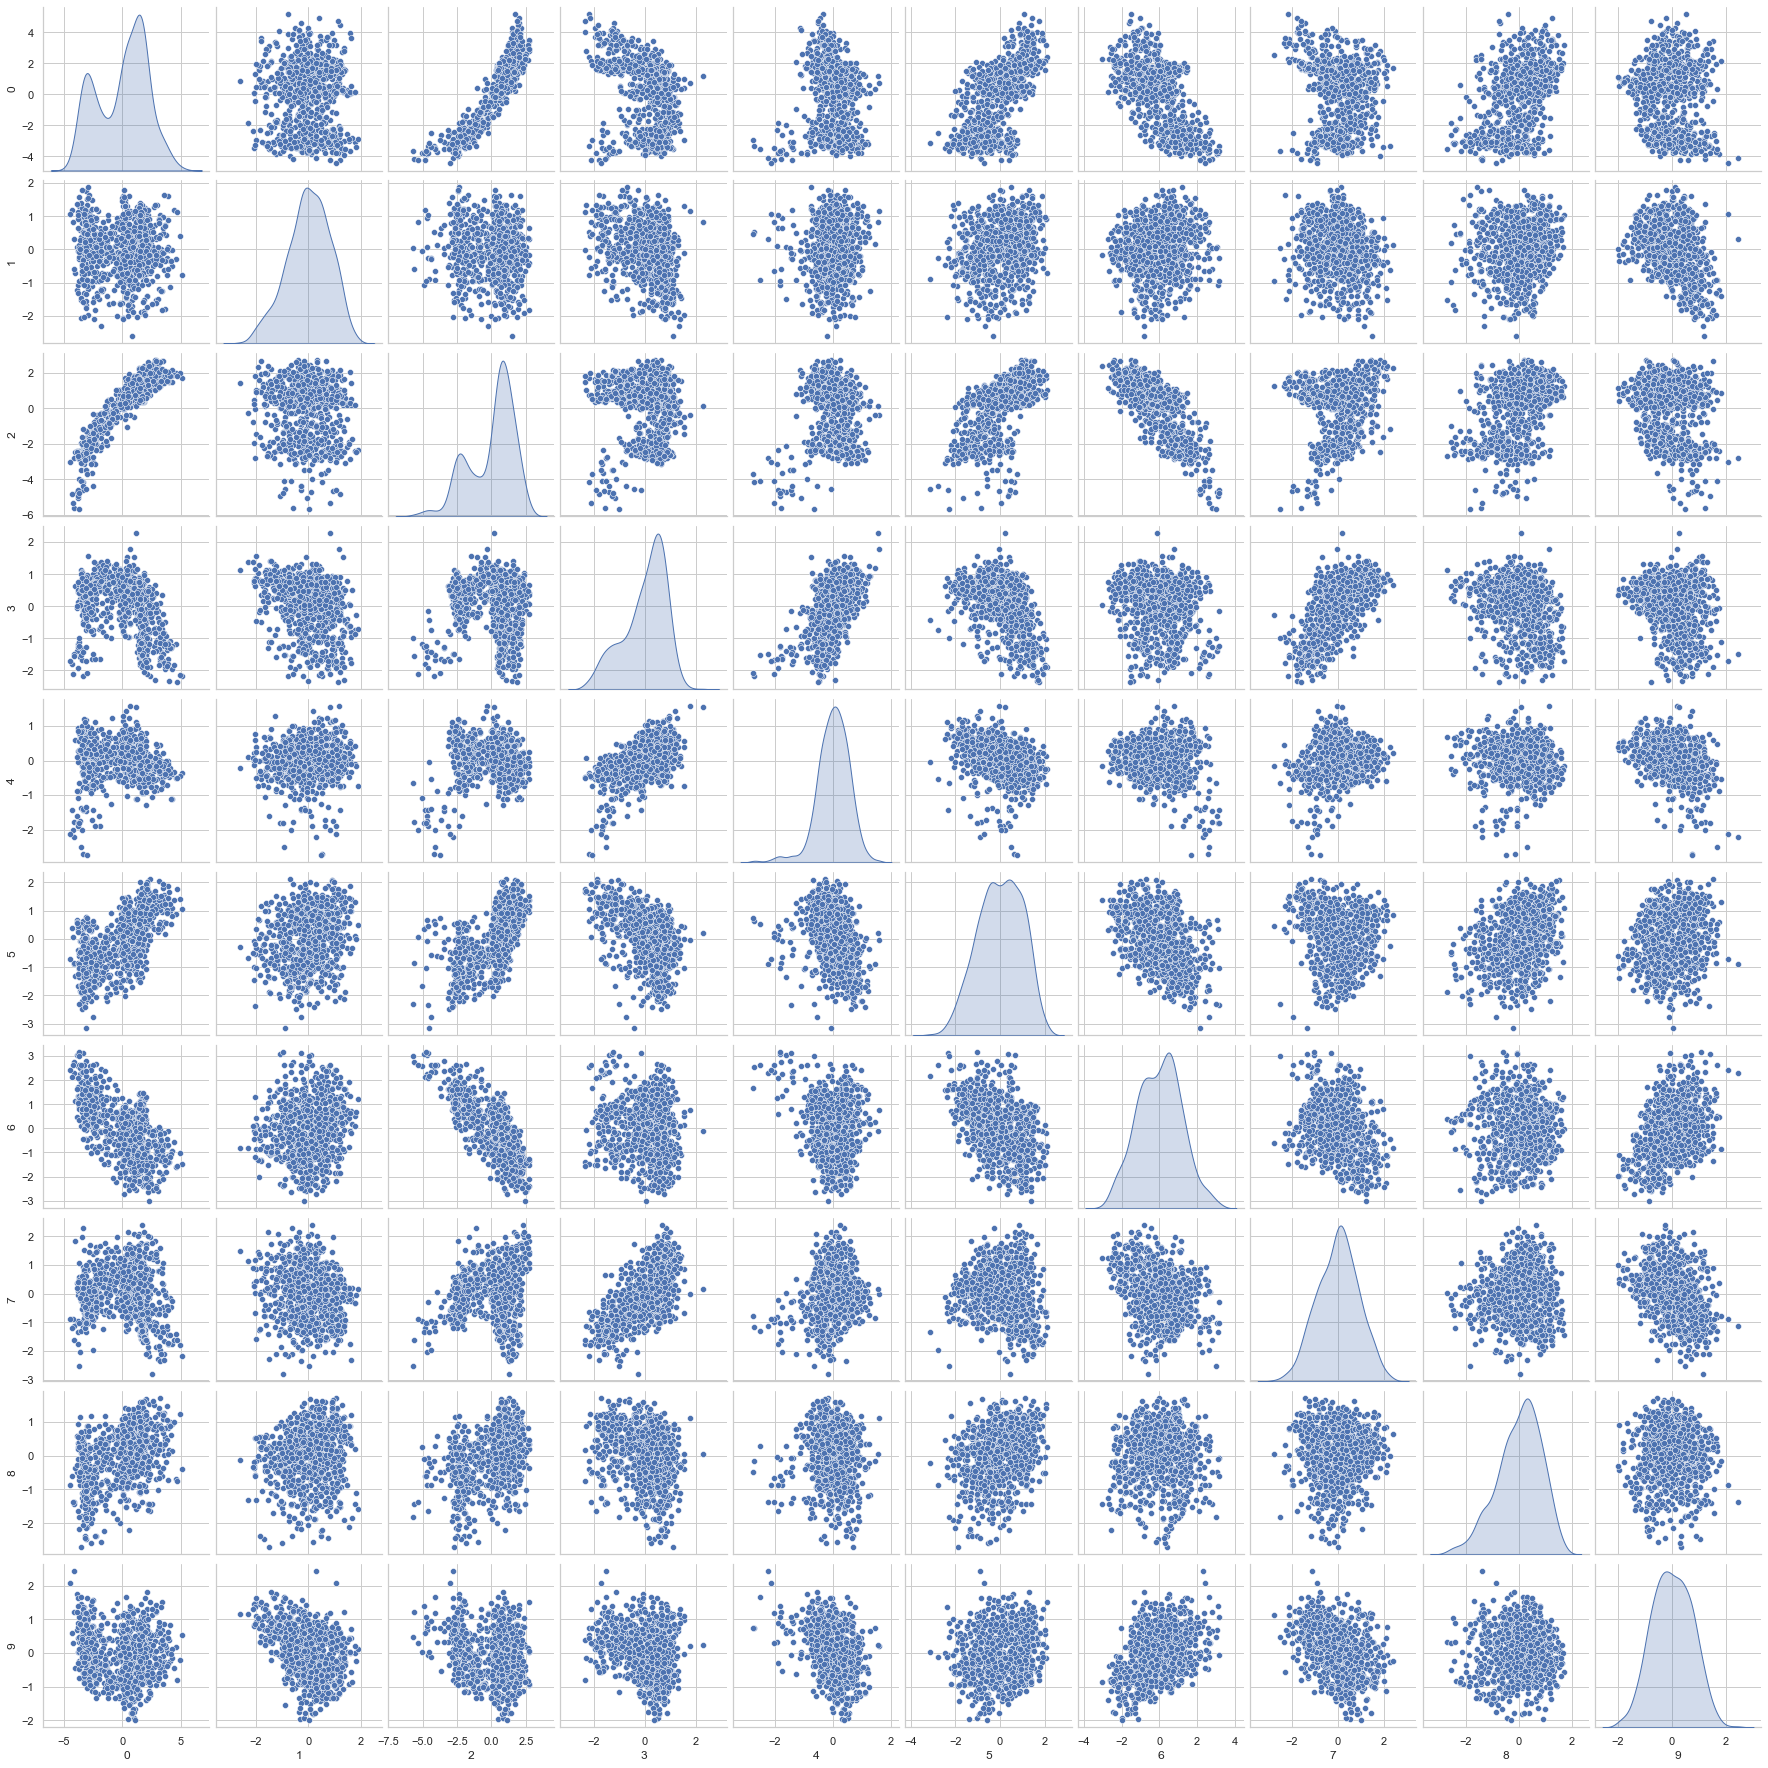

In [49]:
#Let us check it visually
sns.pairplot(Proj_data_df, diag_kind='kde') 

* Now, there are almost no correlation between independent attributes but there are some attributes which shows some correlation. The reason behind this is that some attributes in data are less correlated but we still taken that for dimentionality reduction. The solution may be we can remove columns which are less correlated then apply PCA.

## Splitting the data

In [50]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(Proj_data_df,y, test_size = 0.3, random_state = 10)

## Model Building

### Logistic Regression

In [51]:
model = LogisticRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)

In [52]:
# check the accuracy on the training data
print('Accuracy on Training data: ',model.score(X_train, y_train))
# check the accuracy on the testing data
print('Accuracy on Testing data: ',model.score(X_test , y_test))
#Calculate the recall value 
print('Recall value: ',metrics.recall_score(y_test, prediction, average='macro'))
#Calculate the precision value 
print('Precision value: ',metrics.precision_score(y_test, prediction, average='macro'))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))
print("Classification Report:\n",metrics.classification_report(prediction,y_test))

Accuracy on Training data:  0.785472972972973
Accuracy on Testing data:  0.7795275590551181
Recall value:  0.7753187631536343
Precision value:  0.7684641594342655
Confusion Matrix:
 [[ 46  13   2]
 [ 17 102   6]
 [  8  10  50]]
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.75      0.70        61
           1       0.82      0.82      0.82       125
           2       0.86      0.74      0.79        68

    accuracy                           0.78       254
   macro avg       0.78      0.77      0.77       254
weighted avg       0.79      0.78      0.78       254



* The accuracy, precision and recall value is reduced after applying PCA because we have reduced the dimensions. 
* Despite giving less accuracy, precision and recall, this model is better as it has taken into consideration the relationship between the independent varibales and reduced the columns which are highly correlated.
* This model is performing well compared to Naive Bayes'and Naive Bayes' k fold models.

In [53]:
resultsDf=pd.DataFrame({'Model':['Logistic'],'Accuracy': model.score(X_test , y_test)},index={'1'})
resultsDf=resultsDf[['Model','Accuracy']]
resultsDf

,Model,Accuracy
1,Logistic,0.779528


### Naive Bayes' Classifier

In [54]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
prediction = model.predict(X_test)

In [55]:
# check the accuracy on the training data
print('Accuracy on Training data: ',model.score(X_train, y_train))
# check the accuracy on the testing data
print('Accuracy on Testing data: ', model.score(X_test , y_test))
#Calculate the recall value 
print('Recall value: ',metrics.recall_score(y_test, prediction, average='macro'))
#Calculate the precision value 
print('Precision value: ',metrics.precision_score(y_test, prediction, average='macro'))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))
print("Classification Report:\n",metrics.classification_report(prediction,y_test))

Accuracy on Training data:  0.6385135135135135
Accuracy on Testing data:  0.6456692913385826
Recall value:  0.6573864335437914
Precision value:  0.7155602935963468
Confusion Matrix:
 [[28  2  1]
 [17 83  4]
 [26 40 53]]
Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.90      0.55        31
           1       0.66      0.80      0.72       104
           2       0.91      0.45      0.60       119

    accuracy                           0.65       254
   macro avg       0.66      0.72      0.62       254
weighted avg       0.75      0.65      0.64       254



* This model is not performing well as compared to other models.

In [56]:
#Store the accuracy results for each kernel in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Model':['Naive Bayes'], 'Accuracy': model.score(X_test, y_test)},index={'2'})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Model','Accuracy']]
resultsDf

,Model,Accuracy
1,Logistic,0.779528
2,Naive Bayes,0.645669


### Using k fold cross validation in Naive Bayes

In [57]:
#Use the Naive Bayes CLassifier with k fold cross validation
scores = cross_val_score(model, Proj_data_df, y, cv=10)
print(scores)
print('Average score: ', np.mean(scores))

[0.6        0.55294118 0.6        0.64705882 0.62352941 0.72941176
 0.66666667 0.60714286 0.67857143 0.6547619 ]
Average score:  0.6360084033613446


In [58]:
#Store the accuracy results for each kernel in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Model':['Naive Bayes k fold'], 'Accuracy': np.mean(scores)},index={'3'})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Model','Accuracy']]
resultsDf

,Model,Accuracy
1,Logistic,0.779528
2,Naive Bayes,0.645669
3,Naive Bayes k fold,0.636008


* The model is not performing well as compared to other models.

### Support Vector Classifier

In [59]:
clf = SVC()
clf.fit(X_train, y_train)
prediction = model.predict(X_test)

In [60]:
# check the accuracy on the training data
print('Accuracy on Training data: ',model.score(X_train, y_train))
# check the accuracy on the testing data
print('Accuracy on Testing data: ', model.score(X_test , y_test))
#Calculate the recall value 
print('Recall value: ',metrics.recall_score(y_test, prediction, average='macro'))
#Calculate the precision value 
print('Precision value: ',metrics.precision_score(y_test, prediction, average='macro'))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))
print("Classification Report:\n",metrics.classification_report(prediction,y_test))

Accuracy on Training data:  0.6385135135135135
Accuracy on Testing data:  0.6456692913385826
Recall value:  0.6573864335437914
Precision value:  0.7155602935963468
Confusion Matrix:
 [[28  2  1]
 [17 83  4]
 [26 40 53]]
Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.90      0.55        31
           1       0.66      0.80      0.72       104
           2       0.91      0.45      0.60       119

    accuracy                           0.65       254
   macro avg       0.66      0.72      0.62       254
weighted avg       0.75      0.65      0.64       254



* This model is not performing well.

In [61]:
#Store the accuracy results for each kernel in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Model':['SVM'], 'Accuracy': model.score(X_test, y_test)},index={'4'})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Model','Accuracy']]
resultsDf

,Model,Accuracy
1,Logistic,0.779528
2,Naive Bayes,0.645669
3,Naive Bayes k fold,0.636008
4,SVM,0.645669


### Using Grid Search to tune model parameters

In [62]:
#Grid search to tune model parameters for SVC
from sklearn.model_selection import GridSearchCV
model = SVC()
params = {'C': [0.01, 0.1, 0.5, 1], 'kernel': ['linear', 'rbf']}
model1 = GridSearchCV(model, param_grid=params, verbose=5)
model1.fit(X_train, y_train)
print("Best Hyper Parameters:\n", model1.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END .............C=0.01, kernel=linear;, score=0.697 total time=   0.0s
[CV 2/5] END .............C=0.01, kernel=linear;, score=0.613 total time=   0.0s
[CV 3/5] END .............C=0.01, kernel=linear;, score=0.669 total time=   0.0s
[CV 4/5] END .............C=0.01, kernel=linear;, score=0.644 total time=   0.0s
[CV 5/5] END .............C=0.01, kernel=linear;, score=0.610 total time=   0.0s
[CV 1/5] END ................C=0.01, kernel=rbf;, score=0.513 total time=   0.0s
[CV 2/5] END ................C=0.01, kernel=rbf;, score=0.513 total time=   0.0s
[CV 3/5] END ................C=0.01, kernel=rbf;, score=0.517 total time=   0.0s
[CV 4/5] END ................C=0.01, kernel=rbf;, score=0.517 total time=   0.0s
[CV 5/5] END ................C=0.01, kernel=rbf;, score=0.508 total time=   0.0s
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.773 total time=   0.0s
[CV 2/5] END ..............C=0.1, kernel=linear;,

In [63]:
#Build the model with the best hyper parameters
model = SVC(C=0.5, kernel="linear")
scores = cross_val_score(model, Proj_data_df, y, cv=10)
print(scores)
print(np.mean(scores))

[0.78823529 0.75294118 0.8        0.82352941 0.72941176 0.83529412
 0.78571429 0.80952381 0.86904762 0.82142857]
0.8015126050420168


In [64]:
#Store the accuracy results for each kernel in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Model':['SVM k fold'], 'Accuracy': np.mean(scores)},index={'5'})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Model','Accuracy']]
resultsDf

,Model,Accuracy
1,Logistic,0.779528
2,Naive Bayes,0.645669
3,Naive Bayes k fold,0.636008
4,SVM,0.645669
5,SVM k fold,0.801513


* We can see that Logistic Regression and SVM k fold is given better results as compared to other models so we can use either of the two models to predict the silhouette as one of three types of vehicle.